<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/surrogate_model_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install smt
!pip install optuna

     |████████████████████████████████| 245kB 8.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for smt: filename=smt-0.7.1-cp36-cp36m-linux_x86_64.whl size=517081 sha256=2cf45843a30745c8e9b9d2f046ce3dd44dbe5e08644e62347f56fd6a0fb5af80
  Stored in directory: /root/.cache/pip/wheels/15/9c/8b/3c801796b1afbf44b79d96117f0e57d5508430bb217ceed4ce
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-cp36-none-any.whl size=25519 sha256=609498693f781c31d0ff2024ceb7cfd9762a36ed14c3d21625e1100bd11feb68
  Stored in directory: /root/.cache/pip/wheels/60/88/1d/b334ee00dd83e82d111ec56c3be91573d335c93870698037f1
Successfully built smt pyDOE2
     |████████████████████████████████| 266kB 9.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 15.2MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 81kB 7.6M

# surrogate model

![img](https://www.researchgate.net/profile/Yueming_Li2/publication/272412256/figure/fig2/AS:614121384968196@1523429356173/Color-online-Surrogate-model-based-optimization-process.png)

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (5 x 5 mtx) ...
         Performing LU fact. (5 x 5 mtx) - done. Time (sec):  0.0002468
      Initializing linear solver - done. Time (sec):  0.0005307
      Solving linear system (col. 0) ...
         Back solving (5 x 5 mtx) ...
         Back solving (5 x 5 mtx) - done. Time (sec):  0.0030901
      Solving linear system (col. 0) - done. Time (sec):  0.0032380
   Training - done. Time (sec):  0.0053124
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting 

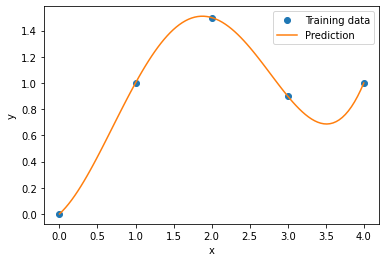

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import RBF

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = RBF(d0=5)
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()

# optimization(minimize)

[I 2020-12-29 02:53:28,180] A new study created in memory with name: no-name-ec061387-9d1b-4607-9e2f-f74c6d6f256e
[I 2020-12-29 02:53:28,183] Trial 0 finished with value: 1.1113638140594666 and parameters: {'x1': 2.7196170979223515}. Best is trial 0 with value: 1.1113638140594666.
[I 2020-12-29 02:53:28,185] Trial 1 finished with value: 0.7456019486139032 and parameters: {'x1': 3.2620870907484427}. Best is trial 1 with value: 0.7456019486139032.
[I 2020-12-29 02:53:28,190] Trial 2 finished with value: 0.7077242114688457 and parameters: {'x1': 3.3666113214569444}. Best is trial 2 with value: 0.7077242114688457.
[I 2020-12-29 02:53:28,194] Trial 3 finished with value: 0.6947398141084502 and parameters: {'x1': 3.594925329411789}. Best is trial 3 with value: 0.6947398141084502.
[I 2020-12-29 02:53:28,195] Trial 4 finished with value: 0.804488174314478 and parameters: {'x1': 3.8207815675398678}. Best is trial 3 with value: 0.6947398141084502.
[I 2020-12-29 02:53:28,198] Trial 5 finished wit

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000656
   
   Prediction time/pt. (sec) :  0.0000656
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000312
   
   Prediction time/pt. (sec) :  0.0000312
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000448
   
   Prediction time/pt. (sec) :  0.0000448
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000360
   
   Prediction time/pt. (sec) :  0.0000360
   
________________________________________________

[I 2020-12-29 02:53:28,397] Trial 39 finished with value: 0.5099136685083467 and parameters: {'x1': 0.5657679926519055}. Best is trial 22 with value: 0.003377013083371091.
[I 2020-12-29 02:53:28,401] Trial 40 finished with value: 1.4376071584026375 and parameters: {'x1': 1.5576126357712035}. Best is trial 22 with value: 0.003377013083371091.
[I 2020-12-29 02:53:28,408] Trial 41 finished with value: 0.18224183446180064 and parameters: {'x1': 0.2504315692234616}. Best is trial 22 with value: 0.003377013083371091.
[I 2020-12-29 02:53:28,414] Trial 42 finished with value: 0.026103538727709177 and parameters: {'x1': 0.04596131140313403}. Best is trial 22 with value: 0.003377013083371091.
[I 2020-12-29 02:53:28,420] Trial 43 finished with value: 0.014362624490835654 and parameters: {'x1': 0.026092098299526512}. Best is trial 22 with value: 0.003377013083371091.
[I 2020-12-29 02:53:28,424] Trial 44 finished with value: 0.0008536410549117443 and parameters: {'x1': 0.0016158189950962187}. Best 

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000544
   
   Prediction time/pt. (sec) :  0.0000544
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000358
   
   Prediction time/pt. (sec) :  0.0000358
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000472
   
   Prediction time/pt. (sec) :  0.0000472
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000441
   
   Prediction time/pt. (sec) :  0.0000441
   
________________________________________________

[I 2020-12-29 02:53:28,600] Trial 70 finished with value: 0.00449524558428023 and parameters: {'x1': 0.008408765881002752}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,605] Trial 71 finished with value: 0.9821858898748902 and parameters: {'x1': 3.9869756053229812}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,609] Trial 72 finished with value: 0.11237729161602888 and parameters: {'x1': 0.1682453389118606}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,615] Trial 73 finished with value: 0.0008669915881197831 and parameters: {'x1': 0.0016410108699177325}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,623] Trial 74 finished with value: 0.0058166716734434215 and parameters: {'x1': 0.01083605667568441}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,632] Trial 75 finished with value: 0.24805631224325558 and parameters: {'x1': 0.3205144150620

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000472
   
   Prediction time/pt. (sec) :  0.0000472
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000415
   
   Prediction time/pt. (sec) :  0.0000415
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000381
   
   Prediction time/pt. (sec) :  0.0000381
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000246
   
   Prediction time/pt. (sec) :  0.0000246
   
________________________________________________

[I 2020-12-29 02:53:28,802] Trial 101 finished with value: 0.04947583191792272 and parameters: {'x1': 0.08256253646347979}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,808] Trial 102 finished with value: 0.005958926840488565 and parameters: {'x1': 0.011096207989353147}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,820] Trial 103 finished with value: 0.12318617303494202 and parameters: {'x1': 0.18166240149086288}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,826] Trial 104 finished with value: 0.04559591220952164 and parameters: {'x1': 0.07671787573892118}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,833] Trial 105 finished with value: 1.3309316770584951 and parameters: {'x1': 2.411039151104736}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:28,839] Trial 106 finished with value: 0.3152623170021197 and parameters: {'x1': 0.3873368440970

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000560
   
   Prediction time/pt. (sec) :  0.0000560
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002651
   
   Prediction time/pt. (sec) :  0.0002651
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000410
   
   Prediction time/pt. (sec) :  0.0000410
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000551
   
   Prediction time/pt. (sec) :  0.0000551
   
________________________________________________

[I 2020-12-29 02:53:29,015] Trial 128 finished with value: 0.12483672128479636 and parameters: {'x1': 0.18368500630421464}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,027] Trial 129 finished with value: 0.0020321000611091627 and parameters: {'x1': 0.003831205554579103}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,038] Trial 130 finished with value: 0.06642433700551315 and parameters: {'x1': 0.10719470048988601}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,054] Trial 131 finished with value: 0.005773706783722259 and parameters: {'x1': 0.01075744028588314}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,063] Trial 132 finished with value: 0.0539110438264165 and parameters: {'x1': 0.089144765391592}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,070] Trial 133 finished with value: 0.003194843240086461 and parameters: {'x1': 0.006000840

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000386
   
   Prediction time/pt. (sec) :  0.0000386
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000746
   
   Prediction time/pt. (sec) :  0.0000746
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0001762
   
   Prediction time/pt. (sec) :  0.0001762
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000710
   
   Prediction time/pt. (sec) :  0.0000710
   
________________________________________________

[I 2020-12-29 02:53:29,225] Trial 151 finished with value: 0.04464011313115809 and parameters: {'x1': 0.07526515504547919}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,230] Trial 152 finished with value: 0.005007922500323085 and parameters: {'x1': 0.009352799493634094}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,238] Trial 153 finished with value: 0.0006688132319262016 and parameters: {'x1': 0.0012668329806875163}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,242] Trial 154 finished with value: 0.1320418345723672 and parameters: {'x1': 0.19243732953738482}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,248] Trial 155 finished with value: 0.09163773660211688 and parameters: {'x1': 0.14157899240935007}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,258] Trial 156 finished with value: 0.0026986816915923846 and parameters: {'x1': 0.0050

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000389
   
   Prediction time/pt. (sec) :  0.0000389
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000403
   
   Prediction time/pt. (sec) :  0.0000403
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000477
   
   Prediction time/pt. (sec) :  0.0000477
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000365
   
   Prediction time/pt. (sec) :  0.0000365
   
________________________________________________

[I 2020-12-29 02:53:29,441] Trial 181 finished with value: 0.003665917158877741 and parameters: {'x1': 0.006875357116572237}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,447] Trial 182 finished with value: 0.005769037659324165 and parameters: {'x1': 0.01074889558337467}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,454] Trial 183 finished with value: 0.05180913228261161 and parameters: {'x1': 0.08603814946319296}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,459] Trial 184 finished with value: 0.09994177195261579 and parameters: {'x1': 0.15241227316554407}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,464] Trial 185 finished with value: 0.005926110686577435 and parameters: {'x1': 0.011036214639971106}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,470] Trial 186 finished with value: 0.0013466569045247824 and parameters: {'x1': 0.0025

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000579
   
   Prediction time/pt. (sec) :  0.0000579
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000560
   
   Prediction time/pt. (sec) :  0.0000560
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000303
   
   Prediction time/pt. (sec) :  0.0000303
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000451
   
   Prediction time/pt. (sec) :  0.0000451
   
________________________________________________

[I 2020-12-29 02:53:29,646] Trial 209 finished with value: 0.04767614050075527 and parameters: {'x1': 0.0798618249411729}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,650] Trial 210 finished with value: 0.1536424708355261 and parameters: {'x1': 0.21798514117278903}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,660] Trial 211 finished with value: 0.0030423749749615443 and parameters: {'x1': 0.005717243438769076}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,673] Trial 212 finished with value: 0.047006857273131794 and parameters: {'x1': 0.07885293702820344}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,682] Trial 213 finished with value: 0.09111526048095629 and parameters: {'x1': 0.1408899191325752}. Best is trial 55 with value: 0.00020071105697973827.
[I 2020-12-29 02:53:29,689] Trial 214 finished with value: 0.003604765448190762 and parameters: {'x1': 0.006761977

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000381
   
   Prediction time/pt. (sec) :  0.0000381
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000362
   
   Prediction time/pt. (sec) :  0.0000362
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000420
   
   Prediction time/pt. (sec) :  0.0000420
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000315
   
   Prediction time/pt. (sec) :  0.0000315
   
________________________________________________

[I 2020-12-29 02:53:29,865] Trial 237 finished with value: 0.04723351950745757 and parameters: {'x1': 0.07919488876412221}. Best is trial 216 with value: 4.3933965499145736e-05.
[I 2020-12-29 02:53:29,869] Trial 238 finished with value: 0.001860104347709112 and parameters: {'x1': 0.0035089111982904726}. Best is trial 216 with value: 4.3933965499145736e-05.
[I 2020-12-29 02:53:29,874] Trial 239 finished with value: 0.0017885636997316836 and parameters: {'x1': 0.003374750662030832}. Best is trial 216 with value: 4.3933965499145736e-05.
[I 2020-12-29 02:53:29,882] Trial 240 finished with value: 2.622907562328347e-05 and parameters: {'x1': 5.025395049410822e-05}. Best is trial 240 with value: 2.622907562328347e-05.
[I 2020-12-29 02:53:29,887] Trial 241 finished with value: 0.045412490240923316 and parameters: {'x1': 0.07643949562035668}. Best is trial 240 with value: 2.622907562328347e-05.
[I 2020-12-29 02:53:29,893] Trial 242 finished with value: 0.08732113297485426 and parameters: {'x1':

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000508
   
   Prediction time/pt. (sec) :  0.0000508
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000350
   
   Prediction time/pt. (sec) :  0.0000350
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000441
   
   Prediction time/pt. (sec) :  0.0000441
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000494
   
   Prediction time/pt. (sec) :  0.0000494
   
________________________________________________

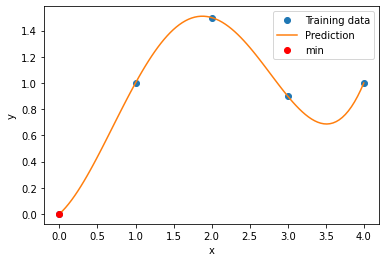

In [3]:
import optuna

def objective(trial: optuna.Trial):
    x1 = trial.suggest_uniform("x1", 0, 4)
    y = sm.predict_values(np.array([x1]))[0][0]
    return y

study = optuna.create_study()
study.optimize(objective, n_trials=250)

# plot
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.plot(study.best_params['x1'],sm.predict_values(np.array([ v for v in study.best_params.values()])),"o",c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction","min"])
plt.show()

# optimization(maximize)

[I 2020-12-29 02:53:30,184] A new study created in memory with name: no-name-6d4f343c-5ff1-4595-8b49-257f6f748896
[I 2020-12-29 02:53:30,191] Trial 0 finished with value: -1.4695195052234205 and parameters: {'x1': 1.6382869028717701}. Best is trial 0 with value: -1.4695195052234205.
[I 2020-12-29 02:53:30,194] Trial 1 finished with value: -1.484961165787316 and parameters: {'x1': 1.6891553343678387}. Best is trial 1 with value: -1.484961165787316.
[I 2020-12-29 02:53:30,198] Trial 2 finished with value: -0.6996137739193102 and parameters: {'x1': 0.7308122652230638}. Best is trial 1 with value: -1.484961165787316.
[I 2020-12-29 02:53:30,202] Trial 3 finished with value: -0.7389317056191429 and parameters: {'x1': 3.721234400005864}. Best is trial 1 with value: -1.484961165787316.
[I 2020-12-29 02:53:30,205] Trial 4 finished with value: -1.4595615606238868 and parameters: {'x1': 2.152718179189758}. Best is trial 1 with value: -1.484961165787316.
[I 2020-12-29 02:53:30,208] Trial 5 finishe

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000508
   
   Prediction time/pt. (sec) :  0.0000508
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000594
   
   Prediction time/pt. (sec) :  0.0000594
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000451
   
   Prediction time/pt. (sec) :  0.0000451
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000408
   
   Prediction time/pt. (sec) :  0.0000408
   
________________________________________________

[I 2020-12-29 02:53:30,395] Trial 36 finished with value: -1.4568944975295668 and parameters: {'x1': 2.1600493484042977}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,402] Trial 37 finished with value: -1.4458335870177874 and parameters: {'x1': 1.5763762379027177}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,408] Trial 38 finished with value: -0.876324245738271 and parameters: {'x1': 0.8860307025477347}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,416] Trial 39 finished with value: -1.2881607851560288 and parameters: {'x1': 1.3131606652902414}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,426] Trial 40 finished with value: -0.9842998062861223 and parameters: {'x1': 3.9885439633388393}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,433] Trial 41 finished with value: -1.5007583276370102 and parameters: {'x1': 1.762401089078991}. Best is trial 31 with val

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000584
   
   Prediction time/pt. (sec) :  0.0000584
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000417
   
   Prediction time/pt. (sec) :  0.0000417
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000627
   
   Prediction time/pt. (sec) :  0.0000627
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000691
   
   Prediction time/pt. (sec) :  0.0000691
   
________________________________________________

[I 2020-12-29 02:53:30,598] Trial 65 finished with value: -1.3450344024210898 and parameters: {'x1': 2.3879342996460347}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,609] Trial 66 finished with value: -1.4824556178395734 and parameters: {'x1': 2.0801377816153073}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,614] Trial 67 finished with value: -1.472220715980036 and parameters: {'x1': 1.6463818139279751}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,619] Trial 68 finished with value: -1.1157897571527293 and parameters: {'x1': 1.114630272651451}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,624] Trial 69 finished with value: -1.5084330286912213 and parameters: {'x1': 1.8279035875468646}. Best is trial 31 with value: -1.510147395324482.
[I 2020-12-29 02:53:30,631] Trial 70 finished with value: -1.4126639058633275 and parameters: {'x1': 2.2636528441059287}. Best is trial 31 with val

   Predicting - done. Time (sec):  0.0000503
   
   Prediction time/pt. (sec) :  0.0000503
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000625
   
   Prediction time/pt. (sec) :  0.0000625
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000427
   
   Prediction time/pt. (sec) :  0.0000427
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000358
   
   Prediction time/pt. (sec) :  0.0000358
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000358
   

[I 2020-12-29 02:53:30,802] Trial 97 finished with value: -1.5097868158622043 and parameters: {'x1': 1.9029728609412622}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:30,813] Trial 98 finished with value: -1.499581552900709 and parameters: {'x1': 2.002481031417627}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:30,819] Trial 99 finished with value: -1.4480589099464163 and parameters: {'x1': 2.1832000308128343}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:30,827] Trial 100 finished with value: -1.4967027685765792 and parameters: {'x1': 1.7398306345755625}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:30,834] Trial 101 finished with value: -1.5099256908136292 and parameters: {'x1': 1.8985389363830736}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:30,838] Trial 102 finished with value: -1.51001282123281 and parameters: {'x1': 1.8951756442186987}. Best is trial 91 wi

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000355
   
   Prediction time/pt. (sec) :  0.0000355
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000272
   
   Prediction time/pt. (sec) :  0.0000272
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000465
   
   Prediction time/pt. (sec) :  0.0000465
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0005541
   
   Prediction time/pt. (sec) :  0.0005541
   
________________________________________________

[I 2020-12-29 02:53:31,006] Trial 126 finished with value: -1.4859131104731682 and parameters: {'x1': 2.066947252782558}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,013] Trial 127 finished with value: -1.440942978213312 and parameters: {'x1': 2.200765302818657}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,017] Trial 128 finished with value: -1.5038555545318975 and parameters: {'x1': 1.7832063296117984}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,022] Trial 129 finished with value: -1.5097937029111934 and parameters: {'x1': 1.9027718271126879}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,032] Trial 130 finished with value: -1.5017330280240857 and parameters: {'x1': 1.9891042964222363}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,040] Trial 131 finished with value: -1.5096778989507764 and parameters: {'x1': 1.8506434417589461}. Best is trial 9

 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000482
   
   Prediction time/pt. (sec) :  0.0000482
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000510
   
   Prediction time/pt. (sec) :  0.0000510
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000360
   
   Prediction time/pt. (sec) :  0.0000360
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000386
   
   Prediction time/pt. (sec) :  0.0000386
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   

[I 2020-12-29 02:53:31,216] Trial 152 finished with value: -1.5102092264908296 and parameters: {'x1': 1.8761920045963167}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,232] Trial 153 finished with value: -1.50954051315061 and parameters: {'x1': 1.909321279837377}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,239] Trial 154 finished with value: -1.5032103129722036 and parameters: {'x1': 1.7785111692290225}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,245] Trial 155 finished with value: -1.5023018202018599 and parameters: {'x1': 1.985296093554173}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,253] Trial 156 finished with value: -1.5101959640067597 and parameters: {'x1': 1.8734421926546876}. Best is trial 91 with value: -1.5102094046402756.
[I 2020-12-29 02:53:31,261] Trial 157 finished with value: -1.4732841573832967 and parameters: {'x1': 2.111734347001678}. Best is trial 91 

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000491
   
   Prediction time/pt. (sec) :  0.0000491
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000465
   
   Prediction time/pt. (sec) :  0.0000465
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000587
   
   Prediction time/pt. (sec) :  0.0000587
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000486
   
   Prediction time/pt. (sec) :  0.0000486
   
________________________________________________

[I 2020-12-29 02:53:31,423] Trial 180 finished with value: -1.5042122529018949 and parameters: {'x1': 1.785904939693552}. Best is trial 169 with value: -1.5102110028539346.
[I 2020-12-29 02:53:31,430] Trial 181 finished with value: -1.509916933076657 and parameters: {'x1': 1.8988466928120102}. Best is trial 169 with value: -1.5102110028539346.
[I 2020-12-29 02:53:31,437] Trial 182 finished with value: -1.5101719424137554 and parameters: {'x1': 1.8706753412349135}. Best is trial 169 with value: -1.5102110028539346.
[I 2020-12-29 02:53:31,442] Trial 183 finished with value: -1.5059587716339011 and parameters: {'x1': 1.9566120324725416}. Best is trial 169 with value: -1.5102110028539346.
[I 2020-12-29 02:53:31,450] Trial 184 finished with value: -1.5098229464276103 and parameters: {'x1': 1.8546851544217888}. Best is trial 169 with value: -1.5102110028539346.
[I 2020-12-29 02:53:31,458] Trial 185 finished with value: -1.4946952016265713 and parameters: {'x1': 2.0286093657067257}. Best is t

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000546
   
   Prediction time/pt. (sec) :  0.0000546
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000472
   
   Prediction time/pt. (sec) :  0.0000472
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000386
   
   Prediction time/pt. (sec) :  0.0000386
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000482
   
   Prediction time/pt. (sec) :  0.0000482
   
________________________________________________

[I 2020-12-29 02:53:31,632] Trial 211 finished with value: -1.509876821992418 and parameters: {'x1': 1.856376215562961}. Best is trial 199 with value: -1.5102118836345362.
[I 2020-12-29 02:53:31,636] Trial 212 finished with value: -1.5094979699412947 and parameters: {'x1': 1.9102911354873453}. Best is trial 199 with value: -1.5102118836345362.
[I 2020-12-29 02:53:31,642] Trial 213 finished with value: -1.5102059755273747 and parameters: {'x1': 1.8812612783581952}. Best is trial 199 with value: -1.5102118836345362.
[I 2020-12-29 02:53:31,648] Trial 214 finished with value: -1.4981465664922329 and parameters: {'x1': 1.7474162852628508}. Best is trial 199 with value: -1.5102118836345362.
[I 2020-12-29 02:53:31,653] Trial 215 finished with value: -1.5061214963745182 and parameters: {'x1': 1.8019665745008624}. Best is trial 199 with value: -1.5102118836345362.
[I 2020-12-29 02:53:31,662] Trial 216 finished with value: -1.4931912862964591 and parameters: {'x1': 2.0358086413277814}. Best is t

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000393
   
   Prediction time/pt. (sec) :  0.0000393
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000343
   
   Prediction time/pt. (sec) :  0.0000343
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000339
   
   Prediction time/pt. (sec) :  0.0000339
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000448
   
   Prediction time/pt. (sec) :  0.0000448
   
________________________________________________

[I 2020-12-29 02:53:31,839] Trial 238 finished with value: -1.487884878324054 and parameters: {'x1': 2.059017976069986}. Best is trial 225 with value: -1.510211901822395.
[I 2020-12-29 02:53:31,849] Trial 239 finished with value: -1.5037618519244764 and parameters: {'x1': 1.7825101120913276}. Best is trial 225 with value: -1.510211901822395.
[I 2020-12-29 02:53:31,861] Trial 240 finished with value: -1.484882336181217 and parameters: {'x1': 1.6888610260823076}. Best is trial 225 with value: -1.510211901822395.
[I 2020-12-29 02:53:31,871] Trial 241 finished with value: -1.510121605121776 and parameters: {'x1': 1.8896631866519547}. Best is trial 225 with value: -1.510211901822395.
[I 2020-12-29 02:53:31,882] Trial 242 finished with value: -1.5101529313944386 and parameters: {'x1': 1.86905749925252}. Best is trial 225 with value: -1.510211901822395.
[I 2020-12-29 02:53:31,891] Trial 243 finished with value: -1.5045350731344318 and parameters: {'x1': 1.9688450147469454}. Best is trial 225 

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000370
   
   Prediction time/pt. (sec) :  0.0000370
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000484
   
   Prediction time/pt. (sec) :  0.0000484
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000484
   
   Prediction time/pt. (sec) :  0.0000484
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000489
   
   Prediction time/pt. (sec) :  0.0000489
   
________________________________________________

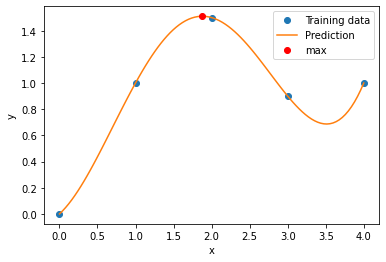

In [4]:
import optuna

def objective(trial: optuna.Trial):
    x1 = trial.suggest_uniform("x1", 0, 4)
    y = sm.predict_values(np.array([x1]))[0][0]
    return -y

study = optuna.create_study()
study.optimize(objective, n_trials=250)

# plot
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.plot(study.best_params['x1'],sm.predict_values(np.array([ v for v in study.best_params.values()])),"o",c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction","max"])
plt.show()

# optimization(Equal)

[I 2020-12-29 02:53:32,164] A new study created in memory with name: no-name-cda5d71f-17e0-448b-a81c-8daddcd77611
[I 2020-12-29 02:53:32,173] Trial 0 finished with value: 1.4178135459156807 and parameters: {'x1': 0.017108440613748943}. Best is trial 0 with value: 1.4178135459156807.
[I 2020-12-29 02:53:32,176] Trial 1 finished with value: 0.0027690325207015538 and parameters: {'x1': 2.5292134314388943}. Best is trial 1 with value: 0.0027690325207015538.
[I 2020-12-29 02:53:32,180] Trial 2 finished with value: 0.03800355933098782 and parameters: {'x1': 1.4736357024980853}. Best is trial 1 with value: 0.0027690325207015538.
[I 2020-12-29 02:53:32,183] Trial 3 finished with value: 0.02285264102673092 and parameters: {'x1': 2.8006599487827226}. Best is trial 1 with value: 0.0027690325207015538.
[I 2020-12-29 02:53:32,185] Trial 4 finished with value: 0.033534967093401084 and parameters: {'x1': 2.321281646132072}. Best is trial 1 with value: 0.0027690325207015538.
[I 2020-12-29 02:53:32,191

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000553
   
   Prediction time/pt. (sec) :  0.0000553
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000424
   
   Prediction time/pt. (sec) :  0.0000424
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000448
   
   Prediction time/pt. (sec) :  0.0000448
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000403
   
   Prediction time/pt. (sec) :  0.0000403
   
________________________________________________

[I 2020-12-29 02:53:32,383] Trial 42 finished with value: 0.007718560381190579 and parameters: {'x1': 2.7186015493672357}. Best is trial 41 with value: 9.090490619443816e-05.
[I 2020-12-29 02:53:32,389] Trial 43 finished with value: 0.04998484342708795 and parameters: {'x1': 2.2405001950487726}. Best is trial 41 with value: 9.090490619443816e-05.
[I 2020-12-29 02:53:32,392] Trial 44 finished with value: 0.0002230840385030204 and parameters: {'x1': 2.5819210960783967}. Best is trial 41 with value: 9.090490619443816e-05.
[I 2020-12-29 02:53:32,402] Trial 45 finished with value: 0.02802657931309248 and parameters: {'x1': 2.8217362221512183}. Best is trial 41 with value: 9.090490619443816e-05.
[I 2020-12-29 02:53:32,407] Trial 46 finished with value: 0.016201700150113404 and parameters: {'x1': 2.4168994081067283}. Best is trial 41 with value: 9.090490619443816e-05.
[I 2020-12-29 02:53:32,412] Trial 47 finished with value: 0.19004636931468827 and parameters: {'x1': 3.2226108603149592}. Best

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000622
   
   Prediction time/pt. (sec) :  0.0000622
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000458
   
   Prediction time/pt. (sec) :  0.0000458
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000424
   
   Prediction time/pt. (sec) :  0.0000424
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000572
   
   Prediction time/pt. (sec) :  0.0000572
   
________________________________________________

[I 2020-12-29 02:53:32,586] Trial 75 finished with value: 1.0938326618828043 and parameters: {'x1': 0.21855700362757036}. Best is trial 53 with value: 1.6130599387382856e-05.
[I 2020-12-29 02:53:32,591] Trial 76 finished with value: 6.36751768374066e-05 and parameters: {'x1': 2.5914484755326086}. Best is trial 53 with value: 1.6130599387382856e-05.
[I 2020-12-29 02:53:32,601] Trial 77 finished with value: 0.021736162526529025 and parameters: {'x1': 2.7958146492644462}. Best is trial 53 with value: 1.6130599387382856e-05.
[I 2020-12-29 02:53:32,609] Trial 78 finished with value: 0.01893847705032815 and parameters: {'x1': 2.4001755893687595}. Best is trial 53 with value: 1.6130599387382856e-05.
[I 2020-12-29 02:53:32,613] Trial 79 finished with value: 7.636139554979175e-06 and parameters: {'x1': 2.606058141241099}. Best is trial 79 with value: 7.636139554979175e-06.
[I 2020-12-29 02:53:32,626] Trial 80 finished with value: 0.009523519412902822 and parameters: {'x1': 2.46315427521321}. Be


   
   Prediction time/pt. (sec) :  0.0002146
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000315
   
   Prediction time/pt. (sec) :  0.0000315
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000615
   
   Prediction time/pt. (sec) :  0.0000615
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000460
   
   Prediction time/pt. (sec) :  0.0000460
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000291
   
   Prediction time/pt. (sec) :  0.0000291
 

[I 2020-12-29 02:53:32,797] Trial 106 finished with value: 0.03262796632979036 and parameters: {'x1': 2.838946573241632}. Best is trial 103 with value: 4.100358566729225e-06.
[I 2020-12-29 02:53:32,802] Trial 107 finished with value: 0.017238077057573815 and parameters: {'x1': 2.4104545652918663}. Best is trial 103 with value: 4.100358566729225e-06.
[I 2020-12-29 02:53:32,808] Trial 108 finished with value: 0.043639620219837416 and parameters: {'x1': 2.2713736614367437}. Best is trial 103 with value: 4.100358566729225e-06.
[I 2020-12-29 02:53:32,817] Trial 109 finished with value: 0.15212595456852618 and parameters: {'x1': 3.1381710813299715}. Best is trial 103 with value: 4.100358566729225e-06.
[I 2020-12-29 02:53:32,822] Trial 110 finished with value: 6.198585217351709e-05 and parameters: {'x1': 2.591593999143433}. Best is trial 103 with value: 4.100358566729225e-06.
[I 2020-12-29 02:53:32,827] Trial 111 finished with value: 0.005083228774141743 and parameters: {'x1': 2.5022679759087

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000567
   
   Prediction time/pt. (sec) :  0.0000567
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000405
   
   Prediction time/pt. (sec) :  0.0000405
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000460
   
   Prediction time/pt. (sec) :  0.0000460
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000601
   
   Prediction time/pt. (sec) :  0.0000601
   
________________________________________________

[I 2020-12-29 02:53:32,996] Trial 132 finished with value: 0.006108718078573567 and parameters: {'x1': 2.4922031645959395}. Best is trial 123 with value: 3.72243223582171e-06.
[I 2020-12-29 02:53:33,003] Trial 133 finished with value: 0.004198872150969521 and parameters: {'x1': 2.6885176428758606}. Best is trial 123 with value: 3.72243223582171e-06.
[I 2020-12-29 02:53:33,012] Trial 134 finished with value: 2.2487443659739728e-07 and parameters: {'x1': 2.6016679969630943}. Best is trial 134 with value: 2.2487443659739728e-07.
[I 2020-12-29 02:53:33,020] Trial 135 finished with value: 0.018634368093058077 and parameters: {'x1': 2.4019891125606287}. Best is trial 134 with value: 2.2487443659739728e-07.
[I 2020-12-29 02:53:33,028] Trial 136 finished with value: 0.0031810942687255186 and parameters: {'x1': 2.52380968879308}. Best is trial 134 with value: 2.2487443659739728e-07.
[I 2020-12-29 02:53:33,035] Trial 137 finished with value: 0.04558859448747818 and parameters: {'x1': 2.882084628

   Predicting - done. Time (sec):  0.0000470
   
   Prediction time/pt. (sec) :  0.0000470
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000448
   
   Prediction time/pt. (sec) :  0.0000448
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000432
   
   Prediction time/pt. (sec) :  0.0000432
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000570
   
   Prediction time/pt. (sec) :  0.0000570
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000470
   

[I 2020-12-29 02:53:33,194] Trial 160 finished with value: 0.015134542144393835 and parameters: {'x1': 2.4236978253385346}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,206] Trial 161 finished with value: 7.282520529392939e-06 and parameters: {'x1': 2.6059704545717186}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,213] Trial 162 finished with value: 0.0009037459488854148 and parameters: {'x1': 2.642691240604253}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,223] Trial 163 finished with value: 0.00017188414697690119 and parameters: {'x1': 2.5844267338128573}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,232] Trial 164 finished with value: 0.006496593146888688 and parameters: {'x1': 2.7091581774016964}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,240] Trial 165 finished with value: 0.006571099505627657 and parameters: {'x1': 2.48

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000477
   
   Prediction time/pt. (sec) :  0.0000477
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000422
   
   Prediction time/pt. (sec) :  0.0000422
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000522
   
   Prediction time/pt. (sec) :  0.0000522
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000546
   
   Prediction time/pt. (sec) :  0.0000546
   
________________________________________________

[I 2020-12-29 02:53:33,408] Trial 189 finished with value: 0.0019791109887400573 and parameters: {'x1': 2.5407642885743265}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,420] Trial 190 finished with value: 0.04116501619186617 and parameters: {'x1': 2.2834514298251816}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,430] Trial 191 finished with value: 0.0002118542847013322 and parameters: {'x1': 2.582444061257264}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,439] Trial 192 finished with value: 0.004368955468095797 and parameters: {'x1': 2.690218820103376}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,448] Trial 193 finished with value: 0.012033964337566982 and parameters: {'x1': 2.444588677260939}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,455] Trial 194 finished with value: 0.0002527066867969625 and parameters: {'x1': 2.623763

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000386
   
   Prediction time/pt. (sec) :  0.0000386
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002580
   
   Prediction time/pt. (sec) :  0.0002580
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000513
   
   Prediction time/pt. (sec) :  0.0000513
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000486
   
   Prediction time/pt. (sec) :  0.0000486
   
________________________________________________

[I 2020-12-29 02:53:33,622] Trial 216 finished with value: 0.0028393251309808683 and parameters: {'x1': 2.6734073604843824}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,635] Trial 217 finished with value: 0.03310736745922134 and parameters: {'x1': 2.8406711209851863}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,642] Trial 218 finished with value: 0.00043446395566754294 and parameters: {'x1': 2.63039202833289}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,653] Trial 219 finished with value: 0.007901544010805438 and parameters: {'x1': 2.476263287266312}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,663] Trial 220 finished with value: 0.015166533400171026 and parameters: {'x1': 2.4234914479215095}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,670] Trial 221 finished with value: 0.00018079382321117246 and parameters: {'x1': 2.5839

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000525
   
   Prediction time/pt. (sec) :  0.0000525
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002317
   
   Prediction time/pt. (sec) :  0.0002317
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000422
   
   Prediction time/pt. (sec) :  0.0000422
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000486
   
   Prediction time/pt. (sec) :  0.0000486
   
________________________________________________

[I 2020-12-29 02:53:33,838] Trial 243 finished with value: 0.0008439580876622128 and parameters: {'x1': 2.562409703983882}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,845] Trial 244 finished with value: 0.005125322767337465 and parameters: {'x1': 1.1277939576160898}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,856] Trial 245 finished with value: 0.008368761815682368 and parameters: {'x1': 2.4723778775904237}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,863] Trial 246 finished with value: 7.759604346719239e-05 and parameters: {'x1': 2.5903156988715668}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,870] Trial 247 finished with value: 0.007175101147026351 and parameters: {'x1': 2.714503685152058}. Best is trial 146 with value: 1.9365519178596542e-11.
[I 2020-12-29 02:53:33,881] Trial 248 finished with value: 0.00021225506672134504 and parameters: {'x1': 2.621

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000584
   
   Prediction time/pt. (sec) :  0.0000584
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000415
   
   Prediction time/pt. (sec) :  0.0000415
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0001991
   
   Prediction time/pt. (sec) :  0.0001991
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 1
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000532
   
   Prediction time/pt. (sec) :  0.0000532
   
________________________________________________

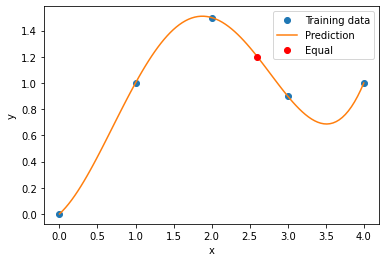

In [5]:
import optuna

set_point = 1.2
def objective(trial: optuna.Trial):
    x1 = trial.suggest_uniform("x1", 0, 4)
    y = sm.predict_values(np.array([x1]))[0][0]
    return (y-set_point)**2

study = optuna.create_study()
study.optimize(objective, n_trials=250)

# plot
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.plot(study.best_params['x1'],sm.predict_values(np.array([ v for v in study.best_params.values()])),"o",c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction","Equal"])
plt.show()